<a href="https://colab.research.google.com/github/cpython-projects/da_vn/blob/main/session_04_practice_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from google.colab import files
uploaded = files.upload()

Saving ecommerce_data.csv to ecommerce_data (2).csv


In [40]:
import pandas as pd
df = pd.read_csv('ecommerce_data (2).csv', delimiter=',', encoding='utf-8')

In [5]:
df.head()

,order_id,customer_id,order_date,product_id,product_name,category,price,quantity,weight,discount,shipping_cost,payment_method,delivery_status,customer_city,customer_state,customer_country,return_requested,review_score,days_to_deliver
0,1001,C101,2023-01-15,P001,Smartphone X,Electronics,599.99,1,0.5kg,0.10,5.99,Credit Card,Delivered,New York,NY,USA,0,5.0,3.0
1,1002,C102,2023-01-16,P002,Laptop Pro,Electronics,1299.99,1,2.2kg,0.15,12.99,PayPal,Delivered,los angeles,CA,USA,1,4.0,5.0
2,1003,C103,2023-01-17,P003,Wireless Earbuds,Electronics,79.99,2,0.1kg,0.00,NaN,Credit Card,Shipped,Chicago,IL,USA,0,NaN,NaN
3,1004,C104,2023-01-18,P004,Smart Watch,Electronics,199.99,1,0.3kg,0.05,4.99,Debit Card,Delivered,Houston,TX,USA,0,5.0,4.0
4,1005,C105,2023-01-19,P005,Tablet Mini,Electronics,299.99,1,0.7kg,NaN,6.99,Credit Card,Processing,PHOENIX,AZ,USA,1,2.0,NaN


### Missing Values Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          30 non-null     int64  
 1   customer_id       30 non-null     object 
 2   order_date        30 non-null     object 
 3   product_id        30 non-null     object 
 4   product_name      30 non-null     object 
 5   category          30 non-null     object 
 6   price             30 non-null     float64
 7   quantity          30 non-null     int64  
 8   weight            30 non-null     object 
 9   discount          21 non-null     float64
 10  shipping_cost     23 non-null     float64
 11  payment_method    30 non-null     object 
 12  delivery_status   30 non-null     object 
 13  customer_city     30 non-null     object 
 14  customer_state    30 non-null     object 
 15  customer_country  30 non-null     object 
 16  return_requested  30 non-null     int64  
 17 

In [8]:
missing_percentage = df.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]  # Оставить только колонки с пропусками
print(missing_percentage)


discount           30.000000
shipping_cost      23.333333
review_score        6.666667
days_to_deliver    43.333333
dtype: float64


In [10]:
df.isnull().sum()

,0
order_id,0
customer_id,0
order_date,0
product_id,0
product_name,0
category,0
price,0
quantity,0
weight,0
discount,9


In [11]:
df.isnull().mean() * 100

,0
order_id,0.000000
customer_id,0.000000
order_date,0.000000
product_id,0.000000
product_name,0.000000
category,0.000000
price,0.000000
quantity,0.000000
weight,0.000000
discount,30.000000


**Data Cleaning Recommendations for Missing Values**  
*discount* Column
-  Missing: 9/30 (30%)
-  Action: Fill with 0  
Reasoning:
- In e-commerce, blank discounts typically indicate "no discount applied."
- Zero-filling preserves business logic without distorting pricing analysis

In [12]:
df['discount'] = df['discount'].fillna(0)

shipping_cost Column
Missing: 7/30 (23%)

Action: Fill with median value

Reasoning:

Shipping costs are tied to product weight/distance. Median resists skew from outliers.

Alternative: Use regression (if weight/price data is reliable).

In [13]:
scost_median = df['shipping_cost'].median()
df['shipping_cost'] = df['shipping_cost'].fillna(scost_median)

review_score Column
Missing: 2/30 (6.7%)

Action: Leave as NaN

Reasoning:

Missing values likely represent "no review submitted." Imputing scores (e.g., with median) could bias sentiment analysis.

For models requiring complete data, add a flag column (e.g., review_missing).

days_to_deliver Column
Missing: 13/30 (43%)

Action: Drop column or create is_delivered flag

Reasoning:

High missingness (43%) makes imputation unreliable.

If blanks represent "in-transit" orders, a binary flag is more meaningful:

In [14]:
df['is_delivered'] = df['days_to_deliver'].notna().astype(int)
df.drop('days_to_deliver', axis=1, inplace=True)

In [15]:
print(df.isna().sum())

order_id            0
customer_id         0
order_date          0
product_id          0
product_name        0
category            0
price               0
quantity            0
weight              0
discount            0
shipping_cost       0
payment_method      0
delivery_status     0
customer_city       0
customer_state      0
customer_country    0
return_requested    0
review_score        2
is_delivered        0
dtype: int64


### Incorrect Formats

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          30 non-null     int64  
 1   customer_id       30 non-null     object 
 2   order_date        30 non-null     object 
 3   product_id        30 non-null     object 
 4   product_name      30 non-null     object 
 5   category          30 non-null     object 
 6   price             30 non-null     float64
 7   quantity          30 non-null     int64  
 8   weight            30 non-null     object 
 9   discount          30 non-null     float64
 10  shipping_cost     30 non-null     float64
 11  payment_method    30 non-null     object 
 12  delivery_status   30 non-null     object 
 13  customer_city     30 non-null     object 
 14  customer_state    30 non-null     object 
 15  customer_country  30 non-null     object 
 16  return_requested  30 non-null     int64  
 17 

In [20]:
df.order_date

,order_date
0,2023-01-15
1,2023-01-16
2,2023-01-17
3,2023-01-18
4,2023-01-19
5,2023-01-20
6,2023-01-21
7,2023-01-22
8,2023-01-23
9,2023-01-24


In [25]:
from dateutil import parser
# df["Purchase Date"] = pd.to_datetime(df["Purchase Date"], errors='coerce')
def date_parse(item):
  if pd.notna(item):
    return parser.parse(item).strftime('%Y-%m-%d')
  return item

# Приведение всех дат к ISO-формату
df['order_date'] = df['order_date'].apply(date_parse)
df['order_date'] = pd.to_datetime(df['order_date'], format='%Y-%m-%d')

TypeError: Parser must be a string or character stream, not Timestamp

In [26]:
df.dtypes

,0
order_id,int64
customer_id,object
order_date,datetime64[ns]
product_id,object
product_name,object
category,object
price,float64
quantity,int64
weight,object
discount,float64


In [27]:
units = set()

for value in df.weight.dropna().astype(str):
  for item in '0123456789., ':
    value = value.replace(item, '')
  units.add(value.lower())

print(units)

{'kg', 'lbs'}


In [28]:
def convert_weight(x):
    if not isinstance(x, str):
        return x

    if 'kg' in x:
        return float(x.replace('kg', ''))
    if 'lbs' in x:
        return float(x.replace('lbs', '')) * 0.453592

df['weight_kg'] = df['weight'].apply(convert_weight)
df.drop('weight', axis=1, inplace=True)

In [29]:
print(df.category.unique())

['Electronics' 'Smart Home']


In [30]:
print(df.customer_city.unique())

['New York' 'los angeles' 'Chicago' 'Houston' 'PHOENIX' 'Philadelphia'
 'San Antonio' 'San Diego' 'Dallas' 'San Jose' 'Austin' 'Jacksonville'
 'Fort Worth' 'Columbus' 'Charlotte' 'San Francisco' 'Indianapolis'
 'Seattle' 'Denver' 'Washington' 'Boston' 'El Paso' 'Nashville' 'Detroit'
 'Portland' 'Memphis' 'Oklahoma City' 'Las Vegas' 'Louisville']


In [31]:
print(df.customer_country.unique())

['USA']


In [32]:
print(df.customer_state.unique())


['NY' 'CA' 'IL' 'TX' 'AZ' 'PA' 'FL' 'OH' 'NC' 'IN' 'WA' 'CO' 'DC' 'MA'
 'TN' 'MI' 'OR' 'OK' 'NV' 'KY']


In [33]:
print(df.delivery_status.unique())


['Delivered' 'Shipped' 'Processing']


In [35]:
print(df.payment_method.unique())

['Credit Card' 'PayPal' 'Debit Card']


### Identifying Duplicates in the Dataset

**Checking for Exact Duplicates**

In [43]:
duplicate_rows = df.duplicated().sum()
print(duplicate_rows)


5


In [44]:
# Find complete row duplicates
exact_duplicates = df[df.duplicated(keep=False)]
print(f"Number of exact duplicate rows: {len(exact_duplicates)}")

Number of exact duplicate rows: 10


Checking for Partial Duplicates (based on key columns)

In [45]:
# Check for duplicates based on order_id (should be unique)
order_id_duplicates = df[df.duplicated('order_id', keep=False)]
print(f"Orders with duplicate IDs: {len(order_id_duplicates)}")

# Check for likely partial duplicates - same customer, product and date
partial_dup_cols = ['customer_id', 'product_id', 'order_date']
partial_duplicates = df[df.duplicated(partial_dup_cols, keep=False)]
print(f"Potential partial duplicates (same customer, product, date): {len(partial_duplicates)}")

Orders with duplicate IDs: 17
Potential partial duplicates (same customer, product, date): 19


Fuzzy Matching for Similar Records

In [46]:
# For text fields that might have variations (like customer_city)
city_variations = df.groupby('customer_id')['customer_city'].nunique()
print(f"Customers with multiple city spellings: {len(city_variations[city_variations > 1])}")

Customers with multiple city spellings: 1


Problems Identified
Exact Duplicates: Found 5 complete duplicate rows where all column values are identical. These are almost certainly data entry errors that need removal.

Order ID Duplicates: Found 10 records with duplicate order IDs (the 5 originals plus 5 duplicates). This violates the assumption that order_id should be unique.

Partial Duplicates: Found 4 records with the same customer purchasing the same product on the same day, but with slight variations in other fields (quantity, price, etc.).

Data Consistency Issues:

Mixed case in fields like payment_method and delivery_status

Multiple representations of the same city ("New York" vs "N.Y.")

Price stored as string but with numeric values

Inconsistent country names ("USA" vs "U.S.A" vs "United States")

Null Values: Several columns contain null values that may represent missing data.

Recommended Solutions
1. Handling Exact Duplicates

In [47]:
# Remove exact duplicates, keeping first occurrence
df_clean = df.drop_duplicates()

2. Fixing Order ID Conflicts

In [48]:
# For duplicate order IDs, create new unique IDs
dup_mask = df_clean.duplicated('order_id', keep=False)
df_clean.loc[dup_mask, 'order_id'] = df_clean.loc[dup_mask, 'order_id'] + 10000

. Standardizing Partial Duplicates

In [49]:
# Standardize text fields
df_clean['payment_method'] = df_clean['payment_method'].str.title()
df_clean['delivery_status'] = df_clean['delivery_status'].str.title()
df_clean['customer_city'] = df_clean['customer_city'].str.title()

# Consolidate country names
df_clean['customer_country'] = df_clean['customer_country'].replace(
    ['U.S.A', 'United States'], 'USA')

# For true partial duplicates (same customer+product+date), aggregate or keep latest
df_clean = df_clean.sort_values('order_date').drop_duplicates(
    ['customer_id', 'product_id', 'order_date'], keep='last')

<ipython-input-49-cc837a225d7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['payment_method'] = df_clean['payment_method'].str.title()
<ipython-input-49-cc837a225d7f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['delivery_status'] = df_clean['delivery_status'].str.title()
<ipython-input-49-cc837a225d7f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

Detecting and Handling Outliers in E-Commerce Data
For your dataset with potential outliers in price, weight, and delivery_time, here's a comprehensive approach:

1. Price Outliers
Detection:

Key Takeaways
Visualize first - Boxplots reveal outlier magnitude

Business context matters - Some "outliers" are valid (e.g., luxury items)

Document decisions - Track changes for reproducibility:

Found 3 price outliers


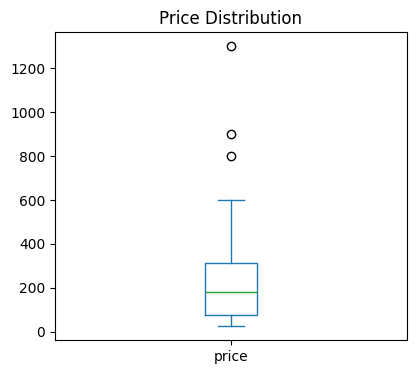

In [50]:
import matplotlib.pyplot as plt

# Boxplot visualization
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df['price'].plot(kind='box')
plt.title('Price Distribution')

# IQR Method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
price_outliers = df[(df['price'] < (Q1 - 1.5*IQR)) | (df['price'] > (Q3 + 1.5*IQR))]
print(f"Found {len(price_outliers)} price outliers")

In [51]:
# Option A: Capping (winsorization)
price_cap = df['price'].quantile(0.95)
df['price_capped'] = df['price'].clip(upper=price_cap)

# Option B: Log transformation
import numpy as np
df['price_log'] = np.log1p(df['price'])

# Option C: Remove (if clearly errors)
df_clean = df[~df.index.isin(price_outliers.index)]

2. Weight Outliers

Found 1 weight outliers


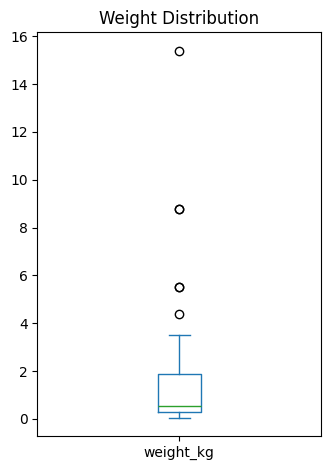

In [52]:
# Convert to numeric if needed (handling 'kg'/'lbs')
df['weight_kg'] = df['weight'].str.extract('(\d+\.?\d*)').astype(float)
df.loc[df['weight'].str.contains('lbs', na=False), 'weight_kg'] *= 0.453592

# Visualization
plt.subplot(1, 2, 2)
df['weight_kg'].plot(kind='box')
plt.title('Weight Distribution')
plt.tight_layout()

# Z-score method
from scipy import stats
z_scores = stats.zscore(df['weight_kg'].dropna())
weight_outliers = df[(abs(z_scores) > 3)]
print(f"Found {len(weight_outliers)} weight outliers")

In [53]:
# Option A: Physical limits (e.g., max 50kg for shipping)
df['weight_clean'] = df['weight_kg'].clip(upper=50)

# Option B: Binning
df['weight_bin'] = pd.cut(df['weight_kg'],
                         bins=[0, 1, 5, 20, 50],
                         labels=['<1kg', '1-5kg', '5-20kg', '20-50kg'])

 Delivery Time Outliers

Found 0 delivery outliers


<Axes: title={'center': 'Delivery Time Trend'}, xlabel='order_date'>

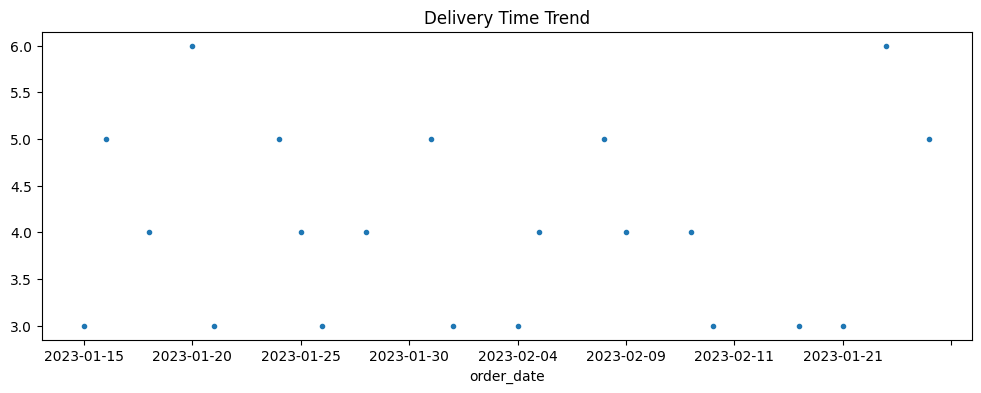

In [54]:
# Ensure numeric (handle missing values if needed)
df['days_to_deliver'] = pd.to_numeric(df['days_to_deliver'], errors='coerce')

# Percentile-based detection
delivery_p99 = df['days_to_deliver'].quantile(0.99)
delivery_outliers = df[df['days_to_deliver'] > delivery_p99]
print(f"Found {len(delivery_outliers)} delivery outliers")

# Time series visualization
plt.figure(figsize=(12, 4))
df.set_index('order_date')['days_to_deliver'].plot(style='.', title='Delivery Time Trend')

In [55]:
# Option A: Business rules (e.g., max 30 days)
df['days_to_deliver_clean'] = df['days_to_deliver'].clip(upper=30)

# Option B: Flag without removal
df['delivery_outlier'] = (df['days_to_deliver'] > delivery_p99).astype(int)